In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('bmh')
%matplotlib inline

# hw2: Principal Compoment Analysis

Обеспечиваем воспроизводимость:

In [2]:
import random
random.seed(1)
np.random.seed(1)

Загружаем данные:

In [3]:
train, test = pd.read_csv('train.csv', dtype=np.int16), pd.read_csv('test.csv', dtype=np.int16)

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int16(785)
memory usage: 62.9 MB


In [5]:
train.tail(3)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41999,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
train.shape

(42000, 785)

Убираем label (т.е. класс) из обучающей выборки:

In [7]:
target = train['label']
train.drop('label', axis='columns', inplace=True)

In [8]:
train.shape

(42000, 784)

Объединяем обучающую и тестовую выборки, при этом индексы в тестовой выборке отрицательны (чтобы не пересекались с обучающей выборкой):

In [9]:
test.index = -test.index
data = pd.concat([train, test], axis = 0)

In [10]:
data.shape

(70000, 784)

### Do-it-yourself PCA

Центрируем данные, но не нормируем (это, кажется, необязательно):

In [11]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler(with_mean=True, with_std=False)
rawdata = scaler.fit_transform(data)

In [12]:
rawdata = rawdata.transpose()

Таким образом мы получили те же данные, но в табличном, а в матричном виде. К ним можно применять различные вещи из линейной алгебры, например, посчитать ковариационную матрицу.

In [13]:
covars = np.cov(rawdata)
covars

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]])

In [14]:
covars.shape

(784, 784)

Размер матрицы получился правильный, это уже радует. Нули не должны пугать нас - это ковариации самых крайних пикселей, которые равны нулю потому что все крайние пиксели белые. Легко проверить, что не все ковариации равны нулю, а только ковариации таких ненужных пикселей, как pixel0:

In [15]:
covars[0,100:130]

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.])

In [16]:
covars[100,100:130]

array([  2.47551666e+03,   1.80141956e+03,   8.64338310e+02,
         2.84872001e+02,   5.60223898e+01,  -5.28030503e+00,
        -6.89101401e+00,  -3.83509671e+00,  -1.26345924e+00,
        -3.92087316e-01,  -6.13443633e-02,   0.00000000e+00,
         0.00000000e+00,  -7.04255530e-03,   3.72197730e-01,
         7.28922262e-02,  -7.45238619e-01,  -3.39590109e+00,
        -8.68223421e+00,  -1.75580833e+01,  -2.81696378e+01,
        -2.87252978e+01,   3.74388023e+00,   1.13628690e+02,
         3.29054908e+02,   7.98437887e+02,   1.53551605e+03,
         2.22001255e+03,   2.27140732e+03,   1.62985283e+03])

In [17]:
from numpy import linalg

In [18]:
eigens = linalg.eig(covars)

Итак, благодаря достижениям линейной алгебры мы получили собственные вектора и собственные значения для них. Сначала поговорим о значениях. Комплексную часть отбросим, она везде 0:

In [19]:
eigenvalues = eigens[0].astype(np.float32)

/home/mousehead/Soft/anaconda4/lib/python3.5/site-packages/ipykernel/__main__.py:1: ComplexWarning: Casting complex values to real discards the imaginary part
  if __name__ == '__main__':


Сортировать собственные значения по убыванию не надо: linalg.eig возвращает их уже отсортированными

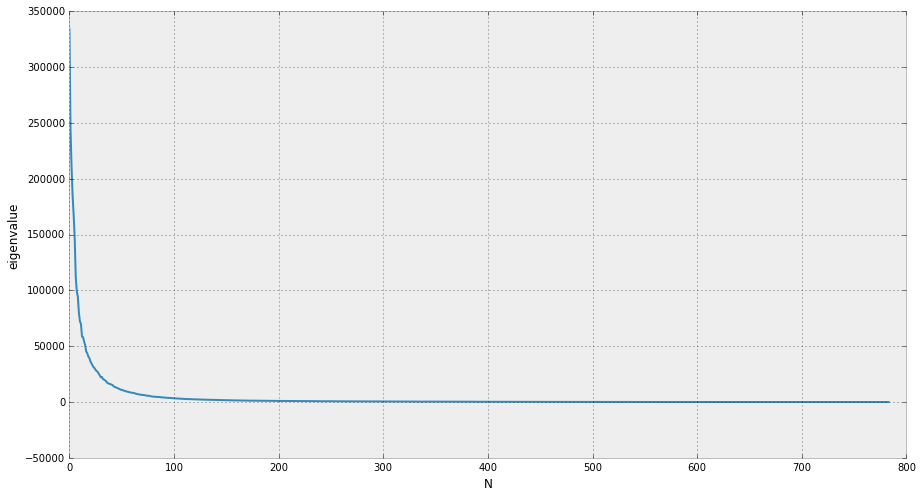

In [20]:
plt.figure(figsize=(15, 8))
plt.xlabel('N')
plt.ylabel('eigenvalue')
plt.plot(eigenvalues);

Не очень-то показательный график. В логарифмической шкале видно лучше:

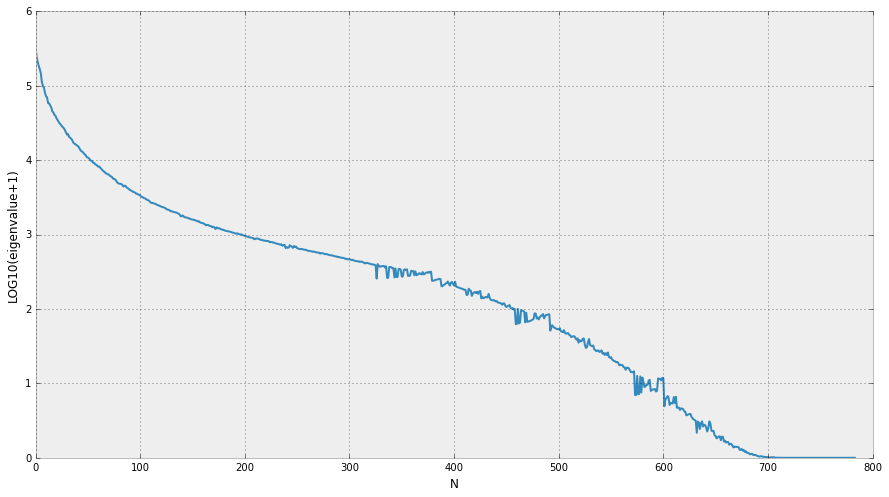

In [21]:
plt.figure(figsize=(15, 8))
plt.xlabel('N')
plt.ylabel('LOG10(eigenvalue+1)')
plt.plot(np.log10(eigenvalues + 1));

Теперь посмотрим на кумулятивную сумму собственных значений (долю объясненной дисперсии)

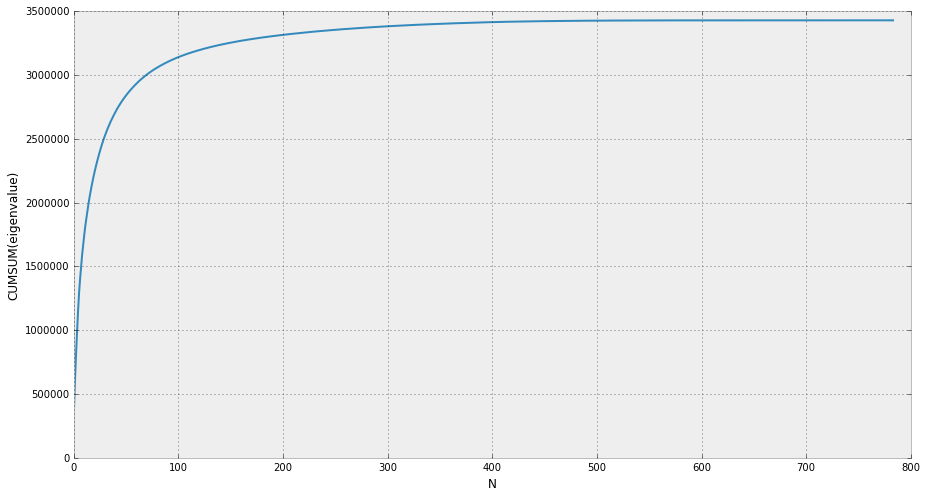

In [22]:
plt.figure(figsize=(15, 8))
plt.xlabel('N')
plt.ylabel('CUMSUM(eigenvalue)')
plt.plot(np.cumsum(eigenvalues));

Опять-таки не очень хорошо видно, поэтому посмотрим на левый фрагмент диаграммы более пристально:

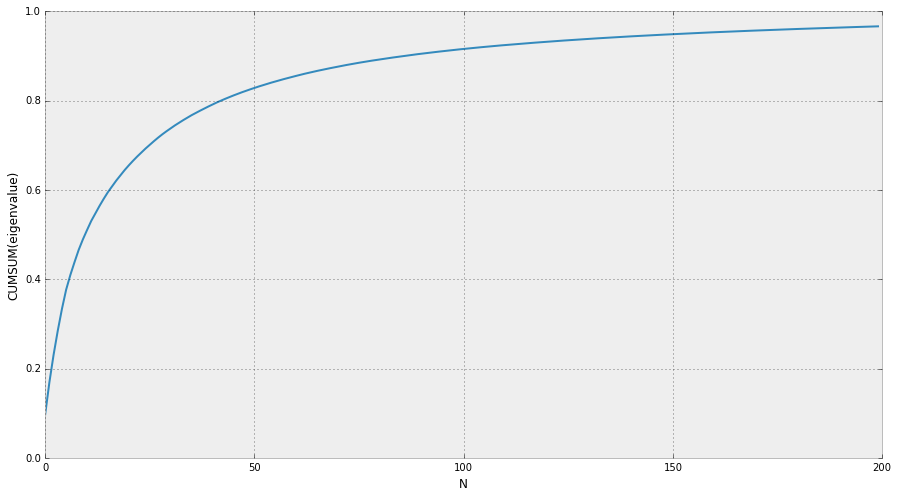

In [23]:
plt.figure(figsize=(15, 8))
plt.xlabel('N')
plt.ylabel('CUMSUM(eigenvalue)')
plt.plot(np.cumsum(eigenvalues[:200])/sum(eigenvalues));

Можно видеть, что уже 50 собственных векторов объясняют более 80% дисперсии. Вопрос выбора количества собственных векторов не имеет какого-то общего ответа. Это всегда trade-off: либо усложняем данные, либо объясняем меньшее количество дисперсии. Этот вопрос всегда решается в зависимости от объема доступной памяти, от характера модели, которая будет использоваться. В данном случае я решил выбрать 30 собственных векторов.

In [24]:
N = 30
print('N of eigenvectors to use: {}\nfraction of explained variance: {:2.3f}'.format(N, 
                                            sum(eigenvalues[:N])/sum(eigenvalues)))

N of eigenvectors to use: 30
fraction of explained variance: 0.732


In [25]:
eigenvectors = eigens[1][:N].astype(np.float32)

/home/mousehead/Soft/anaconda4/lib/python3.5/site-packages/ipykernel/__main__.py:1: ComplexWarning: Casting complex values to real discards the imaginary part
  if __name__ == '__main__':


### Visualizing eigenvectors

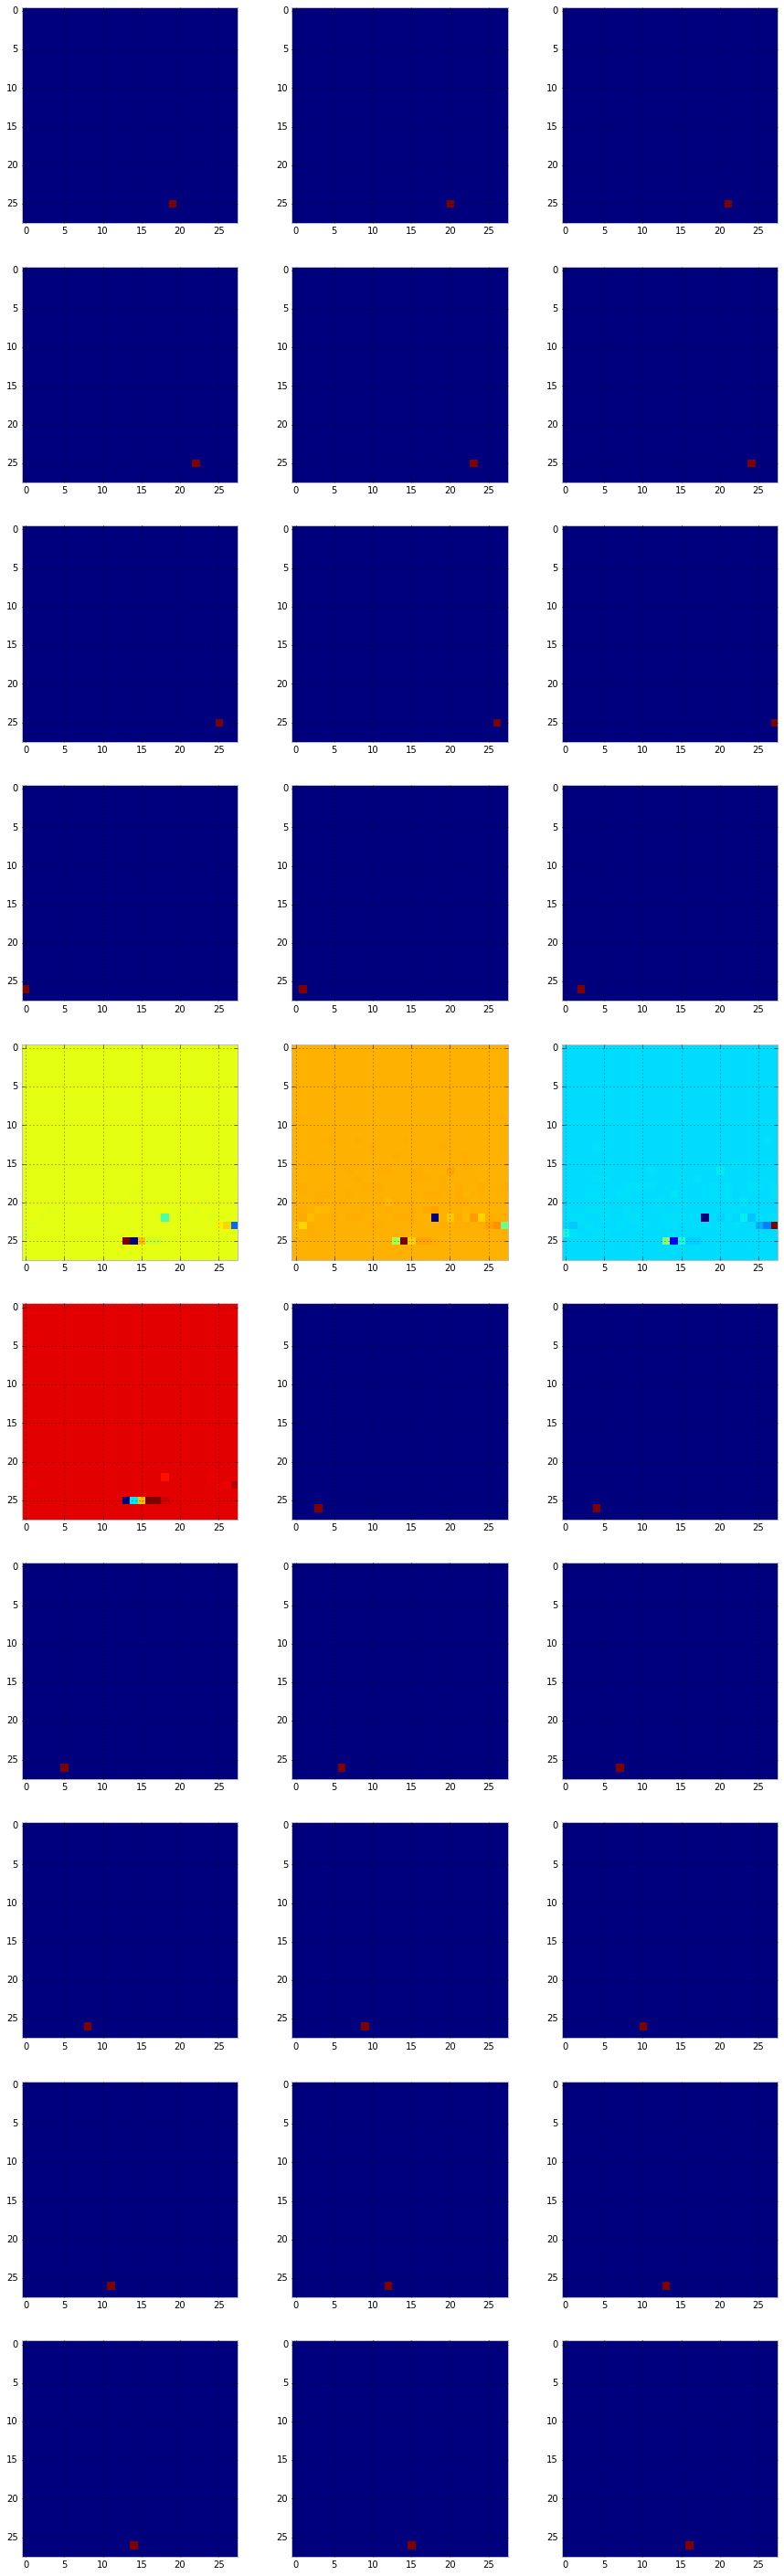

In [26]:
fig = plt.figure(1,figsize=(15, 50))
i = 1
for eig in eigenvectors:
    img = (eig+10).reshape((28, 28))
    plt.subplot(10,3,i)
    plt.imshow(img, interpolation='nearest')
    i += 1
plt.show()

К сожалению, результаты не очень-то красивые. Постараемся как-то это интерпретировать. Почему нижние пиксели оказались настолько важными? Почему не центральные? Один из вариантов -- что центральные пиксели слишком неустойчивы, их значение сильно зависит от наклона цифры, от почерка. По нижнему ряду пикселей уже можно отличить 1 от 8, 5 от 4 и т.д. Правда мы имеем в виду не совсем нижний ряд. Что касается самых крайних пикселей, они бессмысленные. Построим, например, три самых бесполезных собственных вектора*:

/home/mousehead/Soft/anaconda4/lib/python3.5/site-packages/ipykernel/__main__.py:3: ComplexWarning: Casting complex values to real discards the imaginary part
  app.launch_new_instance()


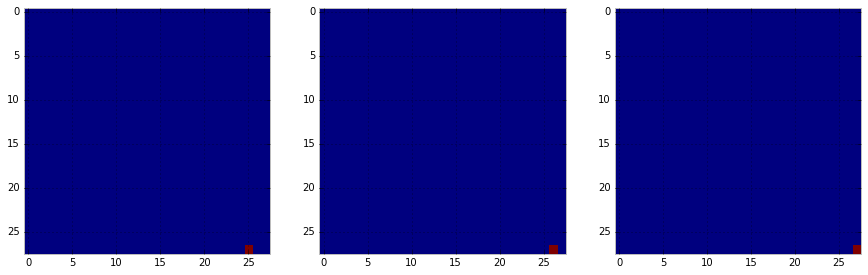

In [27]:
fig = plt.figure(1,figsize=(15, 10))
i = 1
for eig in eigens[1][-3:].astype(np.float32):
    img = eig.reshape((28, 28))
    plt.subplot(1,3,i)
    plt.imshow(img, interpolation='nearest')
    i += 1
plt.show()

Неудивительно, что такие пиксели бесполезны -- они всегда белые.

\*на самом деле эти три вектора не бесполезнее, например, четвертого с конца. десятки векторов, имеющие собственные значения 0.000, одинаково бесполезны, и мы посмотрели лишь три из них (рисовать все, честно говоря, нет никакого желания)

# hw3: Clustering

Обеспечиваем воспроизводимость:

In [28]:
import random
random.seed(1)
np.random.seed(1)

Загружаем датасет:

In [29]:
from sklearn.datasets import load_iris 

In [30]:
iris = load_iris()

In [31]:
X = iris.data
y = iris.target

Вот как примерно выглядят переменные:

In [32]:
X[:3]

array([[ 5.1,  3.5,  1.4,  0.2],
       [ 4.9,  3. ,  1.4,  0.2],
       [ 4.7,  3.2,  1.3,  0.2]])

### K-means

In [33]:
from sklearn.cluster import KMeans

Создадим кластеризатор на 5 кластеров, обучим его на X (то есть на всех четырех переменных), и выведем групповую ошибку

In [34]:
nclus = 5
model = KMeans(n_clusters = nclus)
model.fit(X)
print('clusters: {}\nerror: {:3.3f}'.format(nclus, model.inertia_))

clusters: 5
error: 46.536


Теперь повторим то же самое, но для разного числа кластеров

In [35]:
iter_history = pd.DataFrame({'clusters': [], 'error': []})
for nclus in range(1, 15):
    model = KMeans(n_clusters = nclus, n_init = 20)
    model.fit(X)
    iter_history = iter_history.append([{'clusters': nclus, 'error' : model.inertia_}])

Таким образом мы получаем зависимость внутриклассовой ошибки от числа кластеров:

In [36]:
iter_history.head()

,clusters,error
0,1.0,680.824400
0,2.0,152.368706
0,3.0,78.940841
0,4.0,57.317873
0,5.0,46.535582


Давайте построим ее.

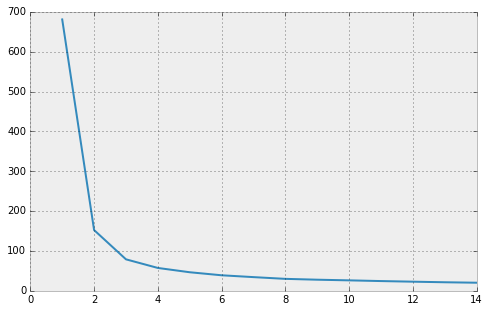

In [37]:
plt.figure(figsize=(8, 5))
plt.plot(iter_history['clusters'], iter_history['error']);

Метод локтя (Elbow method) подразумевает выбор некоторого переломного числа кластеров, после которого изменение становится не таким значительным. В нашем случае (если определять визуально) приходится делать выбор между двумя и тремя кластерами.

Так как все-таки переход от 2 кластеров к 3 уменьшает ошибку почти вдвое, выберем 3.

In [38]:
nclus = 3
model = KMeans(n_clusters = nclus)
model.fit(X)
print('clusters: {}\nerror: {:3.3f}'.format(nclus, model.inertia_))

clusters: 3
error: 78.941


In [39]:
preds = model.predict(X)
preds

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 1,
       2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2,
       1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1], dtype=int32)

In [40]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

Можно видеть, что нам очень повезло, и обозначения нашего кластеризатора совпали с обозначениями из y. И тем не менее они отличаются (напомним, что KMeans принимает только X, а y ему никто не передавал, потому что это unsupervised метод)

Проверим точность кластеризации:

In [41]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(y, preds)
print('{:.4f}'.format(acc))

0.8933


Неплохая точность. Пользуясь значением точности и размером датасета, найдем количество образцов, определенных неправильно:

In [42]:
wrong = (1.0 - acc) * len(y)
print('total samples: {}\nincorrectly attributed: {:.3f}'.format(len(y), wrong))

total samples: 150
incorrectly attributed: 16.000


### Agglomerative clustering

In [43]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

In [44]:
def plot_dendrogram(obs, linkage_method):
    plt.figure(figsize=(20, 10))
    plt.title('Hierarchical Clustering Dendrogram, method={}'.format(linkage_method))
    plt.xlabel('sample index')
    plt.ylabel('distance')
    dendrogram(linkage(obs, linkage_method), leaf_rotation=90, leaf_font_size=5);

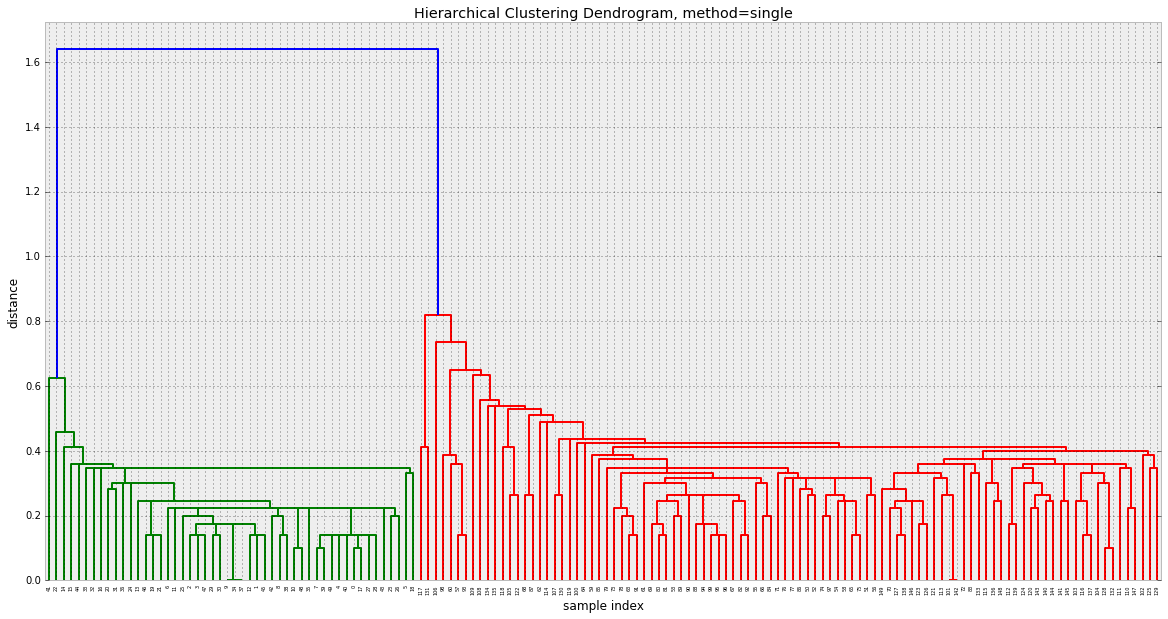

In [45]:
plot_dendrogram(X, 'single')  

Вообще *single* - плохой метод. Он определяет расстояние между кластерами как минимальное расстояние между точками кластеров - то есть между касающимися кластерами, пусть и большими - расстояние 0. Этот метод приводится заодно, но не стоит воспринимать его результаты серьезно. Перейдем к более пристойным методам. 

Информация о методах (то есть метриках межкластерного расстояния) есть на странице
https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.cluster.hierarchy.linkage.html

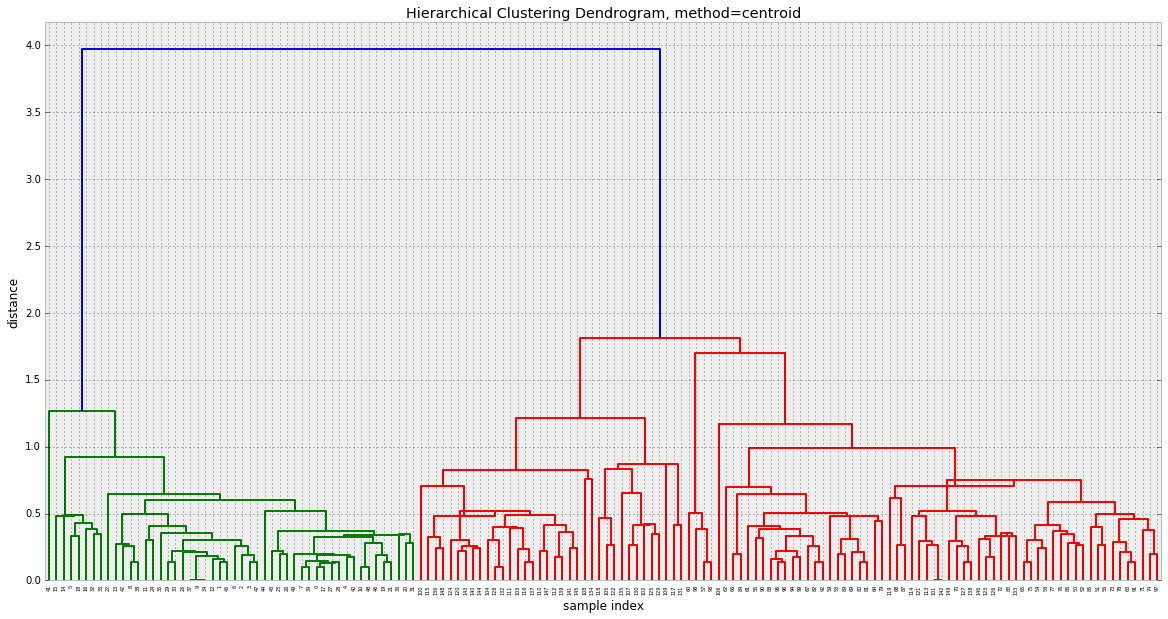

In [46]:
plot_dendrogram(X, 'centroid')

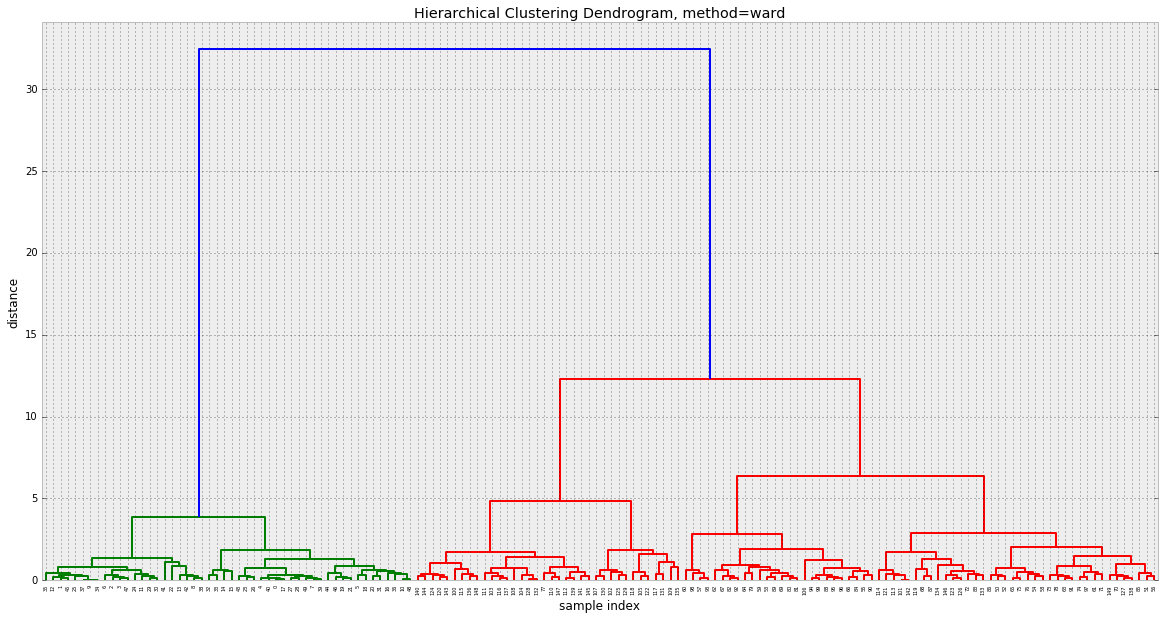

In [47]:
plot_dendrogram(X, 'ward')

Многие считают ward (https://en.wikipedia.org/wiki/Ward%27s_method) наиболее универсальным и надежным методом. На дендрограмме для ward видно, что 3 - удачное число кластеров. В свою очередь, по двум предыдущим диаграммам нельзя сделать такой вывод - все выглядит так, будто оптимальное число кластеров может быть равно только двум.

Теперь получим эти три кластера

In [48]:
model = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
model

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
            connectivity=None, linkage='ward',
            memory=Memory(cachedir=None), n_clusters=3, n_components=None,
            pooling_func=<function mean at 0x7f82e0270400>)

In [49]:
predsag = model.fit_predict(X)
predsag

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 0,
       2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2, 2, 0, 0, 2, 2, 2,
       0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

Можно видеть, что здесь кластеры названы не так, как мы раньше их называли. Придется переназвать их:

In [50]:
def _substitute(x):
    if x == 2:
        return 2
    else:
        return 1-x
    
predsag = np.array(list(map(_substitute, predsag)))
predsag

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 1,
       2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2,
       1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1])

Порядок восстановлен! Теперь посмотрим, какая точность получилась

In [51]:
acc = accuracy_score(y, predsag)
print('{:.4f}'.format(acc))

0.8933


Точность оказалась такая же. Однако предсказания не совсем совпадают:

In [52]:
print(repr(preds - predsag))

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])


Таким образом, результат кластеризации различается для двух образцов.

### Reducing dimensionsionality

In [53]:
from sklearn.decomposition import PCA

Запустим PCA и оставим 2 компоненты

In [54]:
decomposer = PCA(n_components=2)

In [55]:
decomposer.fit(X)
newX = decomposer.transform(X)

In [56]:
X[:5]

array([[ 5.1,  3.5,  1.4,  0.2],
       [ 4.9,  3. ,  1.4,  0.2],
       [ 4.7,  3.2,  1.3,  0.2],
       [ 4.6,  3.1,  1.5,  0.2],
       [ 5. ,  3.6,  1.4,  0.2]])

In [57]:
newX[:5]

array([[-2.68420713, -0.32660731],
       [-2.71539062,  0.16955685],
       [-2.88981954,  0.13734561],
       [-2.7464372 ,  0.31112432],
       [-2.72859298, -0.33392456]])

Итак, все получилось. Теперь, когда измерений не 4, а 2, мы наконец можем посмотреть на данные. Сначала просто посмотрим на данные:

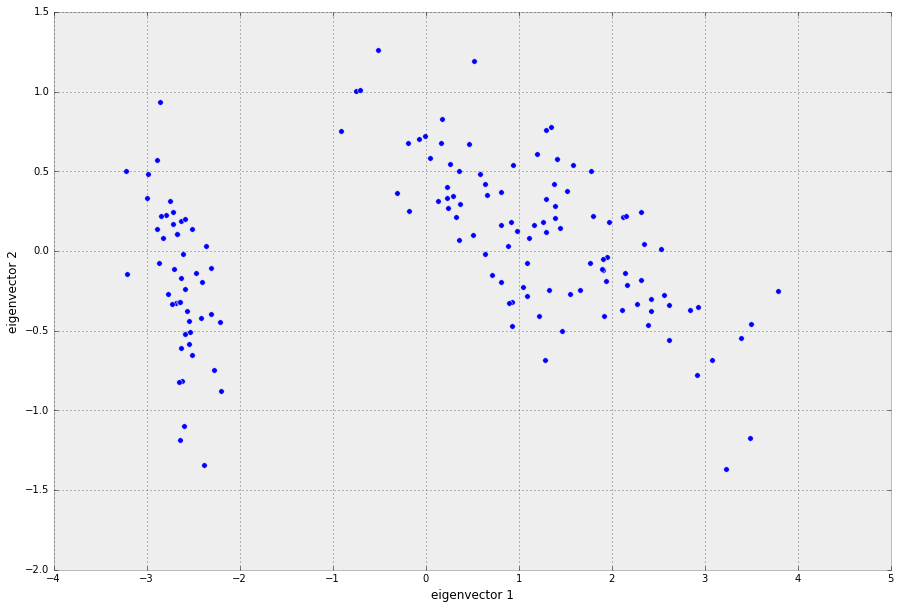

In [58]:
plt.figure(figsize=(15, 10))
plt.xlabel('eigenvector 1')
plt.ylabel('eigenvector 2')
plt.scatter(newX[:,0], newX[:,1], s=30);

Теперь становится понятно, почему нам приходилось сомневаться между двумя и тремя кластерами. Действительно, два выглядели бы даже более убедительно (по крайней мере в двумерном виде). Теперь посмотрим, как аггломеративный алгоритм кластеризовал эти данные:

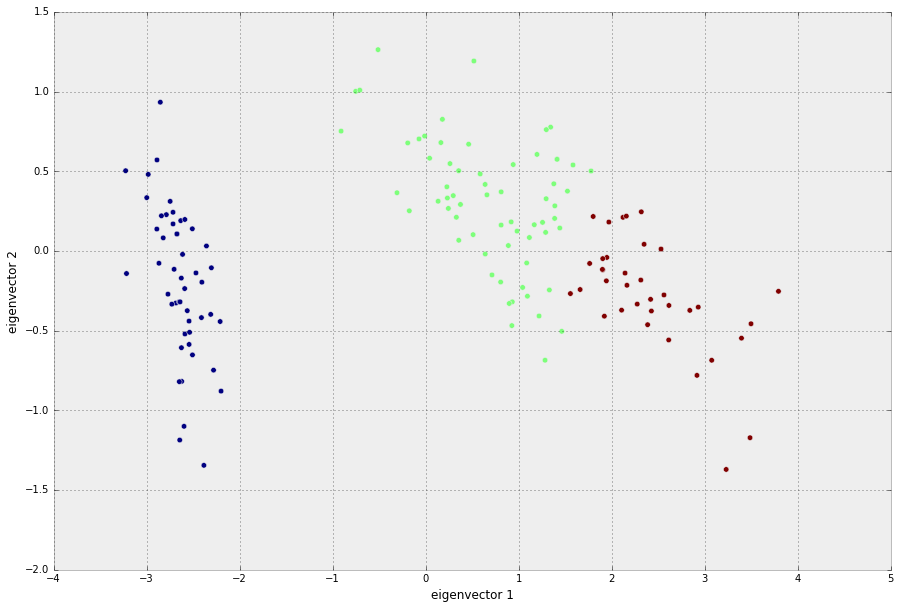

In [59]:
plt.figure(figsize=(15, 10))
plt.xlabel('eigenvector 1')
plt.ylabel('eigenvector 2')
plt.scatter(newX[:,0], newX[:,1], c=predsag, s=30);

Выгдядит весьма правдоподобно. Напоследок посмотрим, как данные выглядят на самом деле:

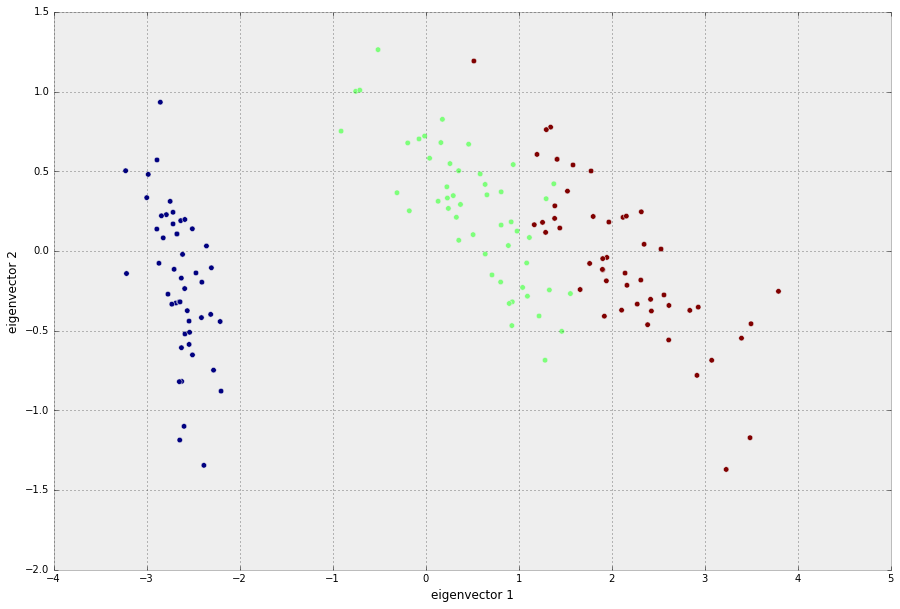

In [60]:
plt.figure(figsize=(15, 10))
plt.xlabel('eigenvector 1')
plt.ylabel('eigenvector 2')
plt.scatter(newX[:,0], newX[:,1], c=y, s=30);

Таким образом, с нулевым классом все хорошо. Можно видеть, как классы 1 и 2 взаимно проникают, и поэтому правильно кластеризовать эту пограничную область у нас не получилось.

### Дополнение

Вообще говоря, перед кластеризацией необходимо нормировать все переменные, потому что иначе переменные с большей дисперсией будут вносить в метрику несправедливо большой вклад. Однако конкретно в этом случае нормирование приводит к падению точности, потому что оказывается, что переменная с большей дисперсией действительно обладает большей разделяющей способностью. Все приведенные выше алгоритмы и диаграммы были использованы также для нормированного X, при этом точность понизилась, а диаграммы стали менее приятными. В связи с этим в итоговый отчет данные такие результаты не были включены.